<a href="https://colab.research.google.com/github/chasemcdo/ECE421/blob/main/Assignment_1/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
dataset = datasets.load_breast_cancer()

In [ ]:
# Question 1
def k_means(data, k):
  # Initial Random Centroid Assignments
  # Pick k training Points
  centroids = []
  for i in range(k):
    randint = np.random.randint(0,len(data)+1)
    centroids.append(data[randint])
    # centroids.append(data[i])

  training = True
  while training:
    ## Assign Training Points

    # for i in centroids:
    #   print(i)
    # print('\n\n')

    centroid_assignments = []
    for training_index in range(len(data)):
      first_run = True
      for centroid_index in range(len(centroids)):
        if first_run:
          first_run = False
          min_dist = euclidean_dist(centroids[centroid_index], data[training_index])
          closest_centroid_index = centroid_index
          # print(f'First Run\nTraining Index: {training_index}\nCCI: {centroid_index}\nmin_dist: {min_dist}')
        else:
          # print(len(centroids[centroid_index]), len(data[training_index]))
          dist = euclidean_dist(centroids[centroid_index], data[training_index])
          # print(f'Else Run\nTraining Index: {training_index}\nCCI: {centroid_index}\ndist: {dist}')
          if dist < min_dist:
            min_dist = dist
            closest_centroid_index = centroid_index
      centroid_assignments.append(closest_centroid_index)

    ## Reassign Centroids Using Average of Assigned Training Points

    # Centroid Assignments is an array of 569 (since that is the amount in the training set) which indicates the assigned centroid for each vector.
    # listOfSummations will contain the new locations for each centroid
    listOfSummations = []
    numOfVectors = []
    for i in range(k):
      listOfSummations.append([0]*len(data[0]))
      numOfVectors.append(0)
    for vector_index in range(len(centroid_assignments)):
      # Get the assigned centroid for the current vector and indicate that another vector was added in numOfVectors list
      assigned_centroid = centroid_assignments[vector_index]
      numOfVectors[assigned_centroid] += 1

      # Loop through all dimensions of current vector and add each value to the corresponding dimension in listOfSummations[assigned_centroid]
      for dim_index in range(len(data[vector_index])):
        listOfSummations[assigned_centroid][dim_index] += data[vector_index][dim_index]

    # Loop through all new centroid summations and divide by the number of vectors to get the averages
    # print(centroid_assignments)
    for i in range(len(listOfSummations)):
      for j in range(len(listOfSummations[i])):
        # print(numOfVectors)
        listOfSummations[i][j] = listOfSummations[i][j]/numOfVectors[i]
    
    matchCount = 0
    for i in range(len(listOfSummations)):
      # print(f'\nArrays:\n{listOfSummations[i]}\n\n{centroids[i]}')
      # print(f'\nArray Lengths:\n{len(listOfSummations[i])}\n\n{len(centroids[i])}')

      # print(f'Types:\n{type(listOfSummations[i])}\n{type(centroids[i])}')

      if (listOfSummations[i] == list(centroids[i])):
        matchCount += 1

    if matchCount >= len(listOfSummations):
      training = False
    
    if training:
      # Moving Centroid Data without linking
      #old_centroids = []
      #for centroid in centroids:
      #  old_centroids.append(list(centroid))
      # print(len(listOfSummations))
      # for i in listOfSummations:
      #   print(len(i))
      centroids = []
      for new_centroid in listOfSummations:
        vector = []
        for new_centroid_element in new_centroid:
          vector.append(new_centroid_element)
        centroids.append(vector)

  # print('Found Final Solution')
  return centroids, centroid_assignments


def euclidean_dist(v, u):
  # Takes in two vectors and computes the euclidean distance between them
  if len(v) != len(u):
    print("Given vectors are of different dimensionality")
    return None

  euc_dist = 0
  for i in range(len(v)):
    euc_dist += np.power(v[i]-u[i],2)
  euc_dist = np.power(euc_dist,1/2)
  return euc_dist

# # Question 3 distortion function
# def get_distortion(data, centroids, centroid_assignments):
#   # Distortion is defined as the sum of the square euclidean distance of all vectors


if __name__ == "__main__":
#   get_distortion(dataset.data, )
    k = 3
#   for k in range(2,8):
#     print(f'\nFinal Solution for k={k}')
    centroids, centroid_assignments = k_means(dataset.data, k)
#     print('Centroids:')
#     for cent in centroids:
#       print(cent)
#     print(f'Centroid Assignments:\n{centroid_assignments}')
  

In [ ]:
# Question 3 distortion function
def get_distortion(data, centroids, centroid_assignments):
  # Distortion is defined as the sum of the square euclidean distance of all vectors
  distortionSum = 0
  for vector_index in range(len(data)):
    distortionSum += np.power(euclidean_dist(data[vector_index], centroids[centroid_assignments[vector_index]]),2)
  return distortionSum

if __name__ == "__main__":
  k_values = []
  dist_list = []
  for k in range(2,8):
    centroids, centroid_assignments = k_means(dataset.data, k)
    dist_sum = get_distortion(dataset.data, centroids, centroid_assignments)
    k_values.append(k)
    dist_list.append(dist_sum)

Text(0.5, 1.0, 'Distortion vs k-values - Breast Cancer Clustering')

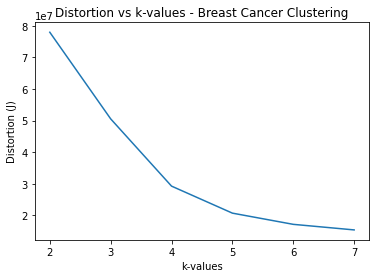

In [ ]:
# Plotting for Question 3
fig = plt.figure()
plt.plot(k_values, dist_list)
plt.xlabel('k-values')
plt.ylabel('Distortion (J)')
plt.title('Distortion vs k-values - Breast Cancer Clustering')